In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import imageio

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

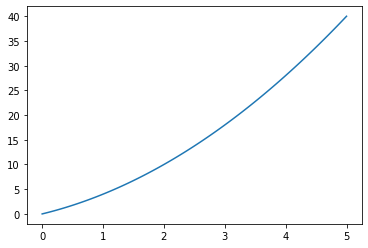

In [30]:
x = np.linspace(0,5,100)
y = x**2 + 3*x
plt.plot(x,y)

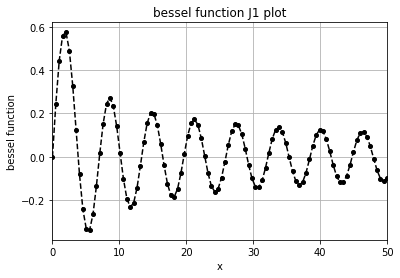

In [25]:
# plotting bessel function
x = np.linspace(0,50,100)
plt.plot(x,sp.jv(1,x), marker='o',ms=4, color = 'black',mec='k',ls='--')
plt.title("bessel function J1 plot")
plt.xlim(0,50)
plt.xlabel('x')
plt.ylabel('bessel function')
plt.grid()


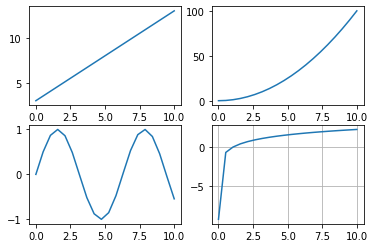

In [23]:
#subplots making
k = np.linspace(0.0001,10,20)

#plot 1:
plt.subplot(2, 2, 1)
plt.plot(k,k+3)

#plot 2:
plt.subplot(2,2,2)
plt.plot(k,k**2)

#plot 3
plt.subplot(2,2,3)
plt.plot(k,np.sin(k))

#plot 4
plt.subplot(2,2,4)
plt.plot(k,np.log(k))
plt.grid()

plt.show()


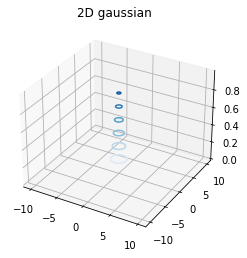

In [29]:
ax = plt.axes(projection='3d')
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)
a,b = np.meshgrid(x,y)
z = np.exp(-((a**2)+(b**2)))

plt.title("2D gaussian ")
ax.contour(x,y,z,cmap='Blues')

#ax.plot_surface(a,b,z,cmap='Blues')
#ax.scatter3D(a,b,z)
plt.show()


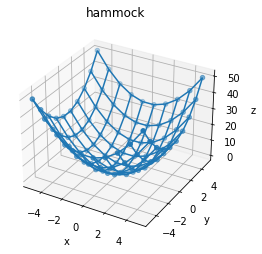

In [40]:
# uniformly lit circular aperture
ax = plt.axes(projection = '3d')
x = np.linspace(-5,5,10)
a,b = np.meshgrid(x,x)
z = a**2 + b**2
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('hammock')

ax.plot_wireframe(a,b,z)

2


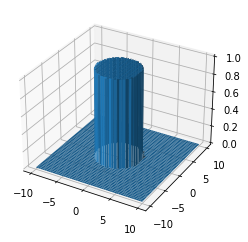

In [59]:
# plotting circular slit
x = np.linspace(-10,10,500)
a,b = np.meshgrid(x,x)
ax = plt.axes(projection='3d')
z = np.heaviside((4-(np.sqrt(a**2 + b**2))),1)
ax.plot_surface(a,b,z)


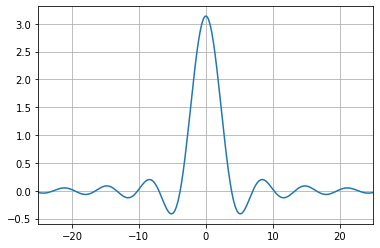

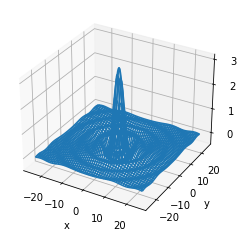

In [10]:
# Airy patterns in 1D and 2D
x = np.linspace(-25,25,200)
y = (2*(np.pi)*sp.jv(1,x))/x
plt.xlim(-25,25)
plt.plot(x,y)
plt.grid()
plt.show()

x = np.linspace(-25,25,200)
y = np.linspace(-25,25,200)
a,b = np.meshgrid(x,y)
R = np.sqrt((a**2)+(b**2))
f = (2*(np.pi)*sp.jv(1,R))/R
ax = plt.axes(projection = '3d')
plt.xlabel('x')
plt.ylabel('y')
ax.plot_wireframe(a,b,f)

plt.show()


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


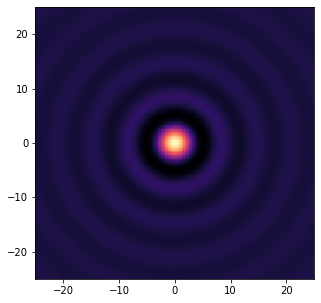

In [22]:
plt.figure(figsize=(5,5))
plt.pcolormesh(a,b,(f),cmap='magma')


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


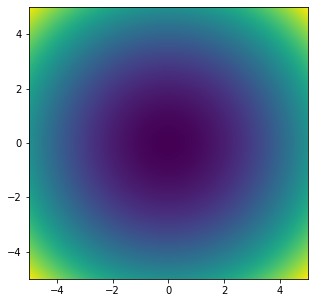

In [11]:
x=np.linspace(-5,5,1000)
xv,yv=np.meshgrid(x,x)
U = xv**2 + yv**2
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U),cmap='viridis')


k value: 1047197.5511965976
the value of A is:1.2566370614359172e-05


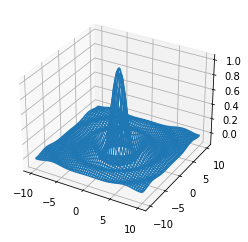

In [55]:
#single slit diff
slit_width = 0.002
distance = 1200
wavelength = 0.000006
A = (np.pi)*((slit_width)**2)
k = 2*(np.pi)/wavelength
print("k value: " + str(k))
print("the value of A is:" +str(A))
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)
a,b = np.meshgrid(x,y)
R = np.sqrt((a**2)+(b**2))
f = 2 * sp.jv(1,(k*slit_width*R/distance))
p = (A*f/(k*R*slit_width/distance))/distance
ax = plt.axes(projection = '3d')
ax.plot_wireframe(a,b,p,cmap = 'winter')
plt.show()

k value: 1047197.5511965976
the value of A is:1.2566370614359172e-05


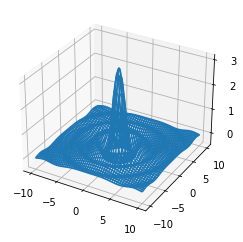

maximum amplitude is 3.1329010466890257e-09


In [62]:
# annular aperture diffraction pattern
slit_width2 = 0.0025
slit_width1 = 0.002
distance = 1000
wavelength = 0.000006
A = (np.pi)*((slit_width1)**2)
B = (np.pi)*((slit_width2)**2)
k = 2*(np.pi)/wavelength
print("k value: " + str(k))
print("the value of A is:" +str(A))
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)
a,b = np.meshgrid(x,y)
R = np.sqrt((a**2)+(b**2))

f = 2 * sp.jv(1,(k*slit_width1*R/distance))
p = (A*f/(k*R*slit_width1/distance))/distance

g =  2 * sp.jv(1,(k*slit_width2*R/distance))
q = (B*f/(k*R*slit_width2/distance))/distance

ax = plt.axes(projection = '3d')
ax.plot_wireframe(a,b,(q-p),cmap = 'winter')
plt.show()
print("maximum amplitude is " + str(np.amax(q-p)))